# THE SPARKS FOUNDATION - GRIP

## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
## Task -1: Predict the percentage of student based on the no of study hours
## Prediction using supervised ML

# Author - Darukumalli Sai Tharun Reddy





In [ ]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


### Reading the Data 

In [ ]:
student_data = pd.read_csv('http://bit.ly/w-data')
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### check if there are any null values in the Data

In [ ]:
student_data.isnull == True

False

# Data Visualization

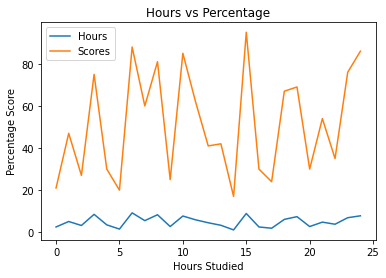

In [ ]:
student_data.plot(kind = 'line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

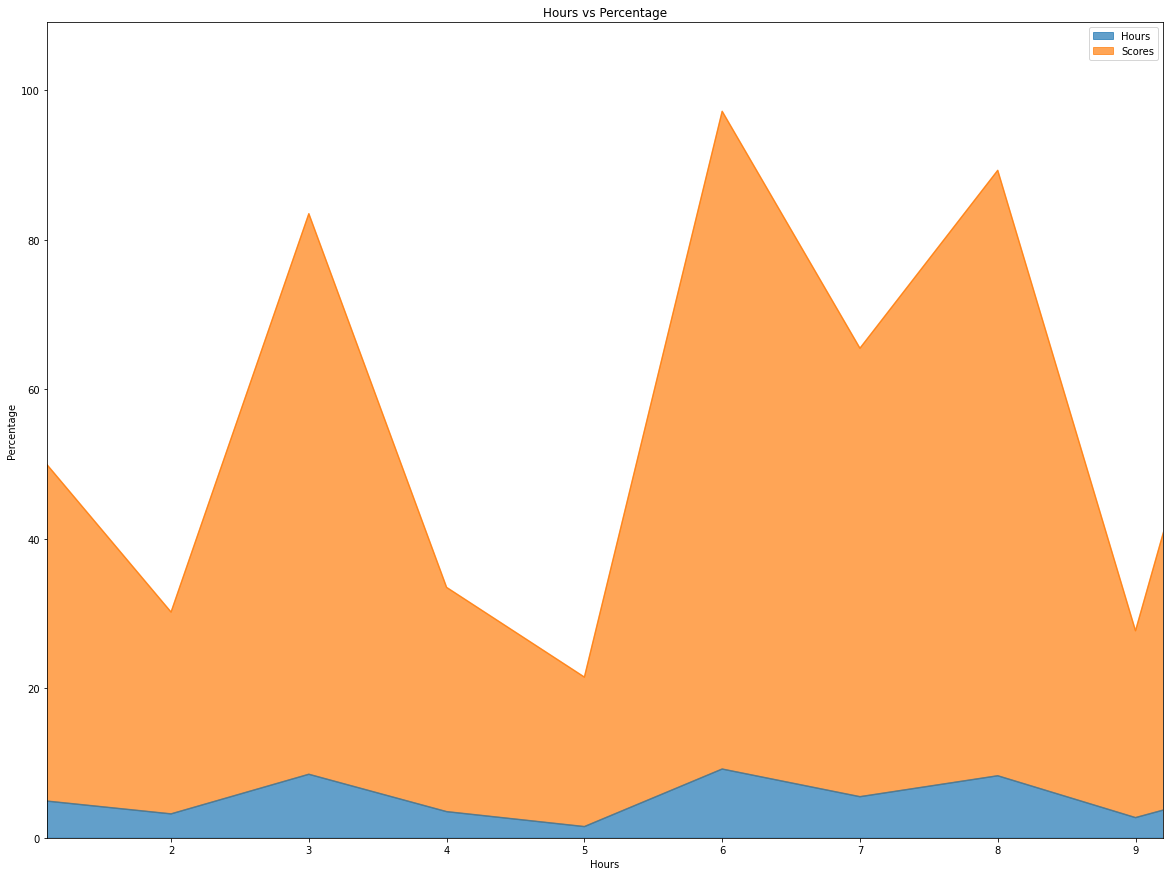

In [ ]:
xmin_hours = min(student_data.Hours)
xmax_hours = max(student_data.Hours)
student_data.plot(kind='area',alpha=0.7,stacked=True,figsize=(20,15),xlim = (xmin_hours,xmax_hours))
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

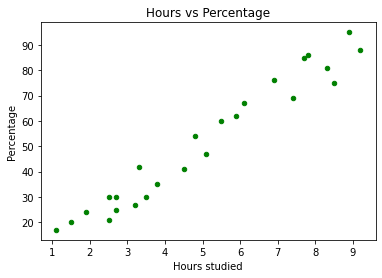

In [ ]:
student_data.plot(kind='scatter',x='Hours',y='Scores',color='g')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()

### Here, we can observe some corelation between the 'Hours' and 'Percentage'

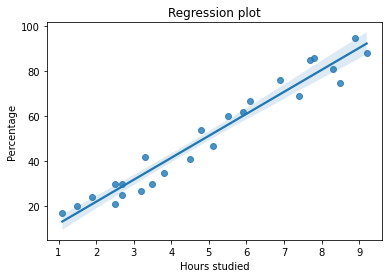

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= student_data['Hours'],y=student_data['Scores'])
plt.title('Regression plot')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()
print(student_data.corr())

### From the regreesion plot we can confirm the values are positively correlated

# Preparing the Model

## 1) Splitting the data

In [ ]:
X = np.asanyarray(student_data[['Hours']])
Y = np.asanyarray(student_data[['Scores']])

# using train_test_split function we make train and validation data
train_X,val_x,train_Y,val_y= train_test_split(X,Y,test_size=0.2,random_state=2)

## 2) Fitting the data to model

In [ ]:
regression_model = LinearRegression()
regression_model.fit(train_X,train_Y)
print("Model Training Completed...")

Model Training Completed...


## Predicting the percentage of marks

In [ ]:
prediction_y = regression_model.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted_marks': [j[0] for j in prediction_y]})
prediction

,Hours,Predicted_marks
0,1.1,12.442587
1,2.5,26.359448
2,1.9,20.395079
3,9.2,92.961570
4,6.9,70.098155


## Predicted Marks vs Original Marks

In [ ]:
score_comparision = pd.DataFrame({'original marks': [i[0] for i in val_y], 'predicted marks': [j[0] for j in prediction_y]})
score_comparision

,original marks,predicted marks
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


## Graphical comparision

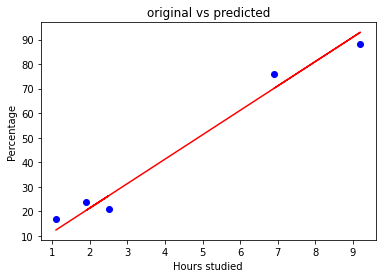

In [ ]:
plt.scatter(x=val_x,y=val_y, color='blue')
plt.plot(val_x,prediction_y, color='red')
plt.title('original vs predicted')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()

In [ ]:
print('Mean Absolute Error: ',mean_absolute_error(val_y,prediction_y))
print('R2 Score: ', r2_score(val_y,prediction_y))

Mean Absolute Error:  4.877039354964476
R2 Score:  0.9735538080811826


### smaller the value of mean absolute error shows the chances of wrong prediction is less. Higher the r2 score, indicates the higher accuracy of model

In [ ]:
hours = 9.25
predicted_score = regression_model.predict([[hours]])
print('No.of Hours: ',hours)
print('Predicted score: ',predicted_score[0][0])

No.of Hours:  9.25
Predicted score:  93.45860055685799


### As per the Regression model prediction if a student studies for 9.25 hours a day, he/she used to get a percentage of 93.45